## Python 언어를 설치합니다.

- https://www.python.org/

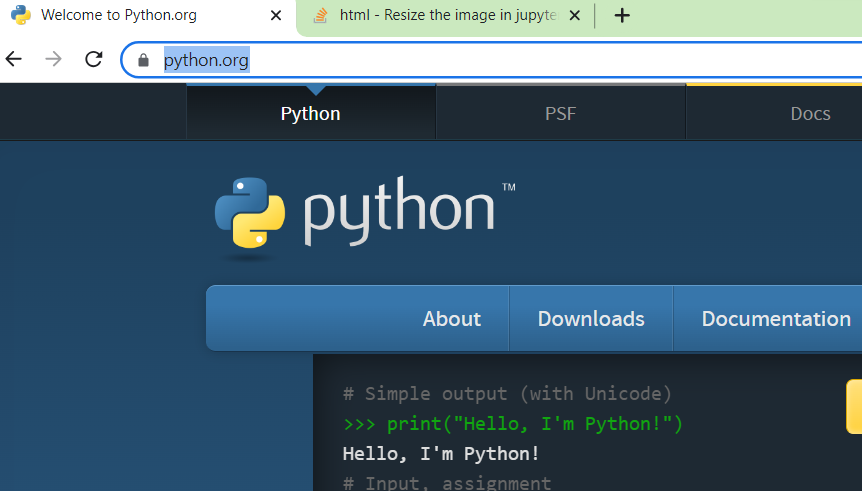

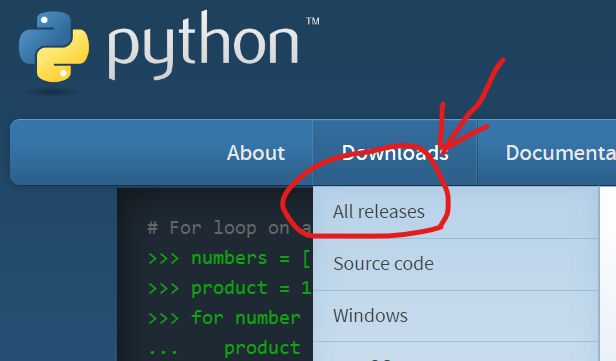

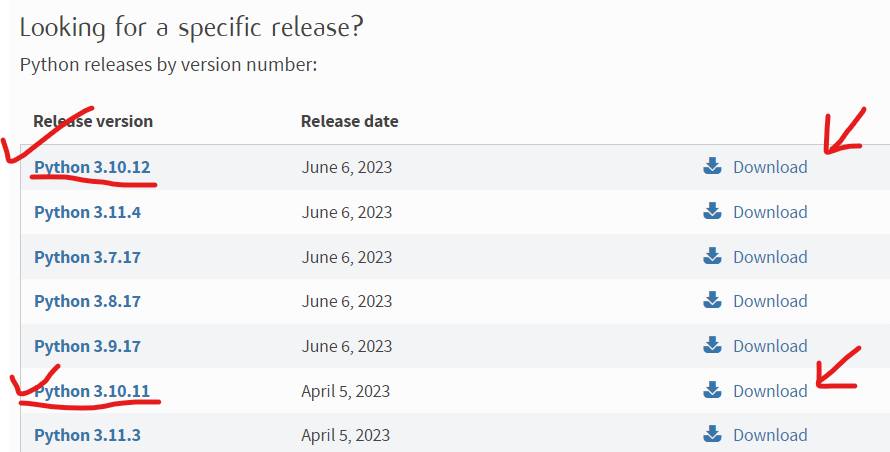

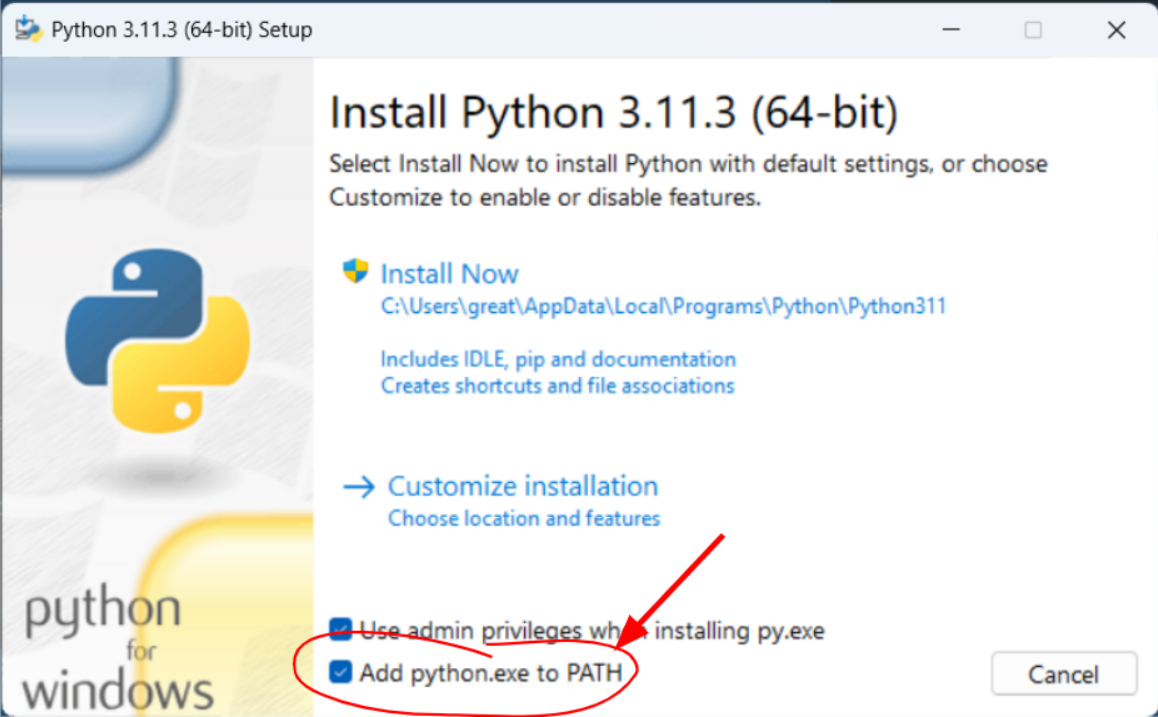

## Visual Studio Code를 설치합니다.

- https://code.visualstudio.com/

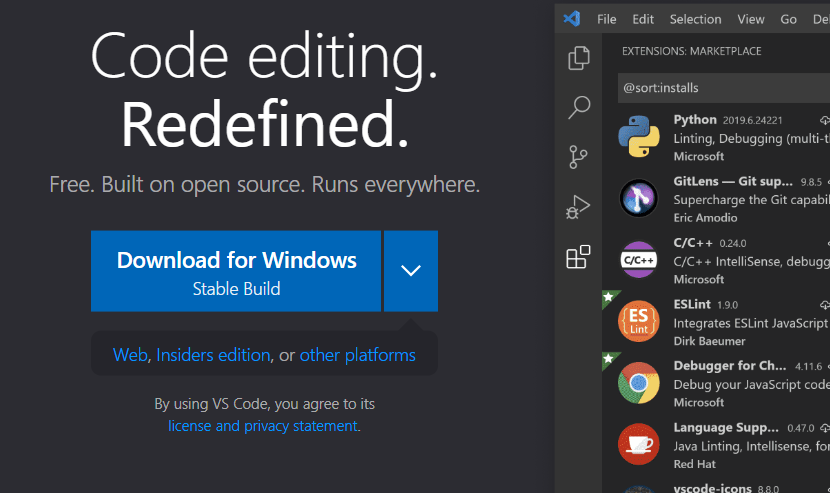

## yolov5 파일을 다운받아야 합니다.

* 우선 git 프로그램을 설치합니다.

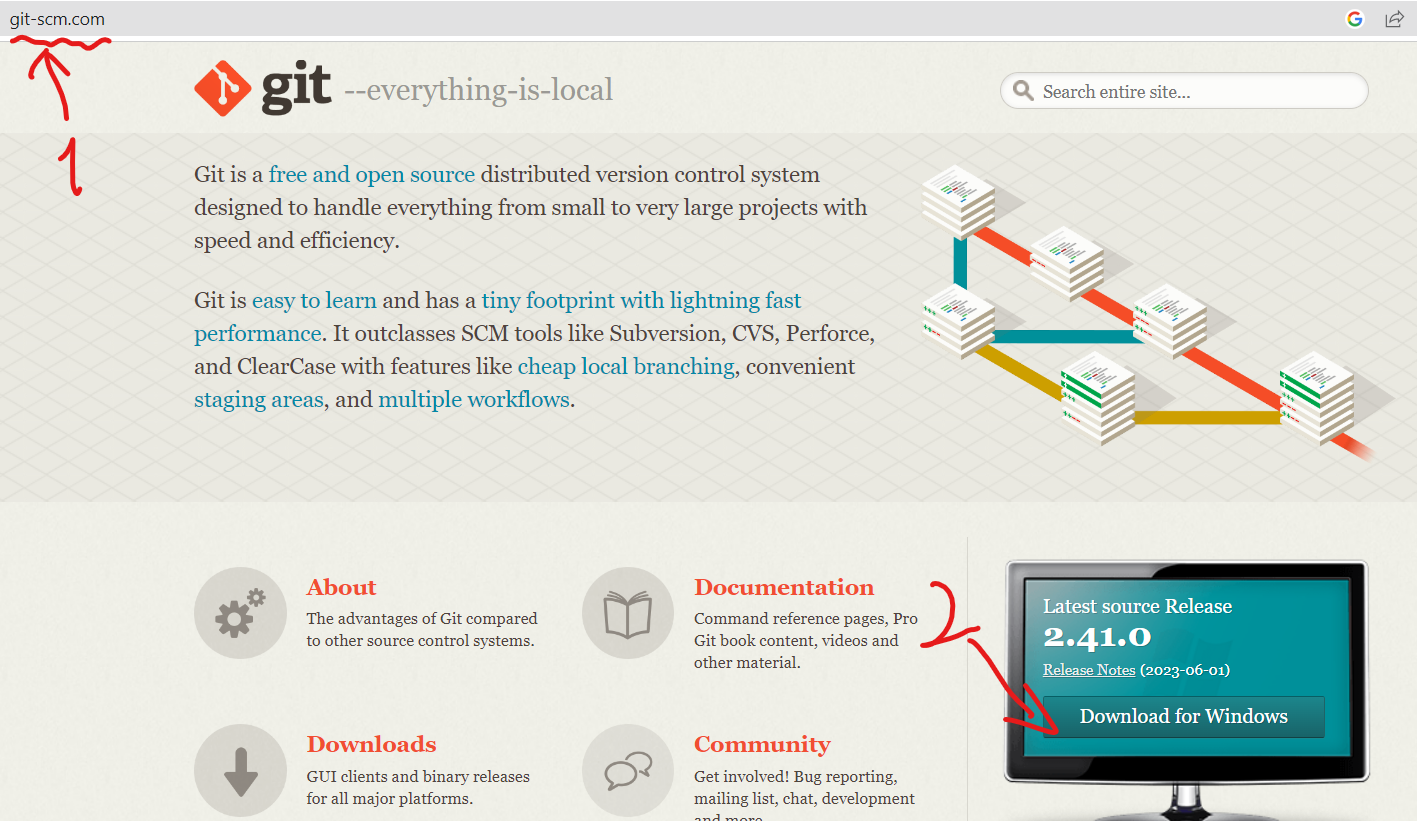

* 해당 사이트에 접속합니다. (https://github.com/ultralytics/yolov5)

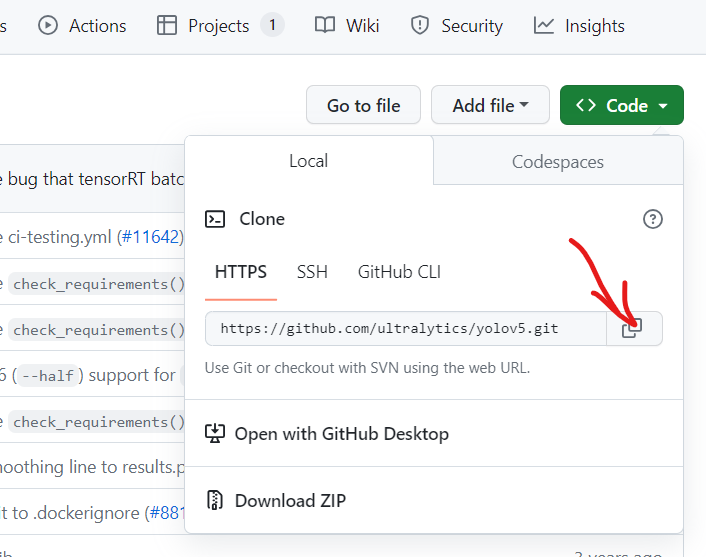

* 적당한 폴더를 선택한 후 (예: "c:\my_class")

git clone https://github.com/ultralytics/yolov5.git 실행

Set-ExecutionPolicy Unrestricted (powershell을 관리자 권한으로 실행한 후 적용)

python -m venv yv5env

pip install -r yolov5/requirements.txt

* 그리고 웹캠의 비디오 화면을 켜 봅시다.

In [ ]:
import cv2

frame = cv2.imread("2nd_test.jpg")

cv2.imshow("image view", frame)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [4]:
import cv2

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("webcam test", frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## 그리고 80개의 사물에 대해서 학습한 모델을 실행시켜 봅니다.
* coco dataset을 이용해서 미리 학습한 내용입니다.
* yolov5의 detect.py 파일을 수행하려면 "vs_redist.x64.exe"를 설치해야 합니다.

In [5]:
import subprocess

subprocess.run(["python", "yolov5/detect.py", 
                "--weights", "yolov5s.pt", 
                "--source", "0"])

# !python yolov5/detect.py --weights yolov5s.pt --source 0

CompletedProcess(args=['python', 'yolov5/detect.py', '--weights', 'yolov5s.pt', '--source', '0'], returncode=0)

* yolov5-master/runs/detect/exp n 폴더에 가면 방금 실행한 내용이 비디오로 저장되어 있습니다. (0.mp4)

## 우리 회사만의 사물인식 모델을 만들어봅시다.


1. 사진을 확보해야 합니다.


2. 라벨링을 해야합니다.
    * Roboflow 서비스를 이용해봅시다. (https://roboflow.com/)

3. 이런 작업을 종합해서 데이터셋을 만들어야 합니다.

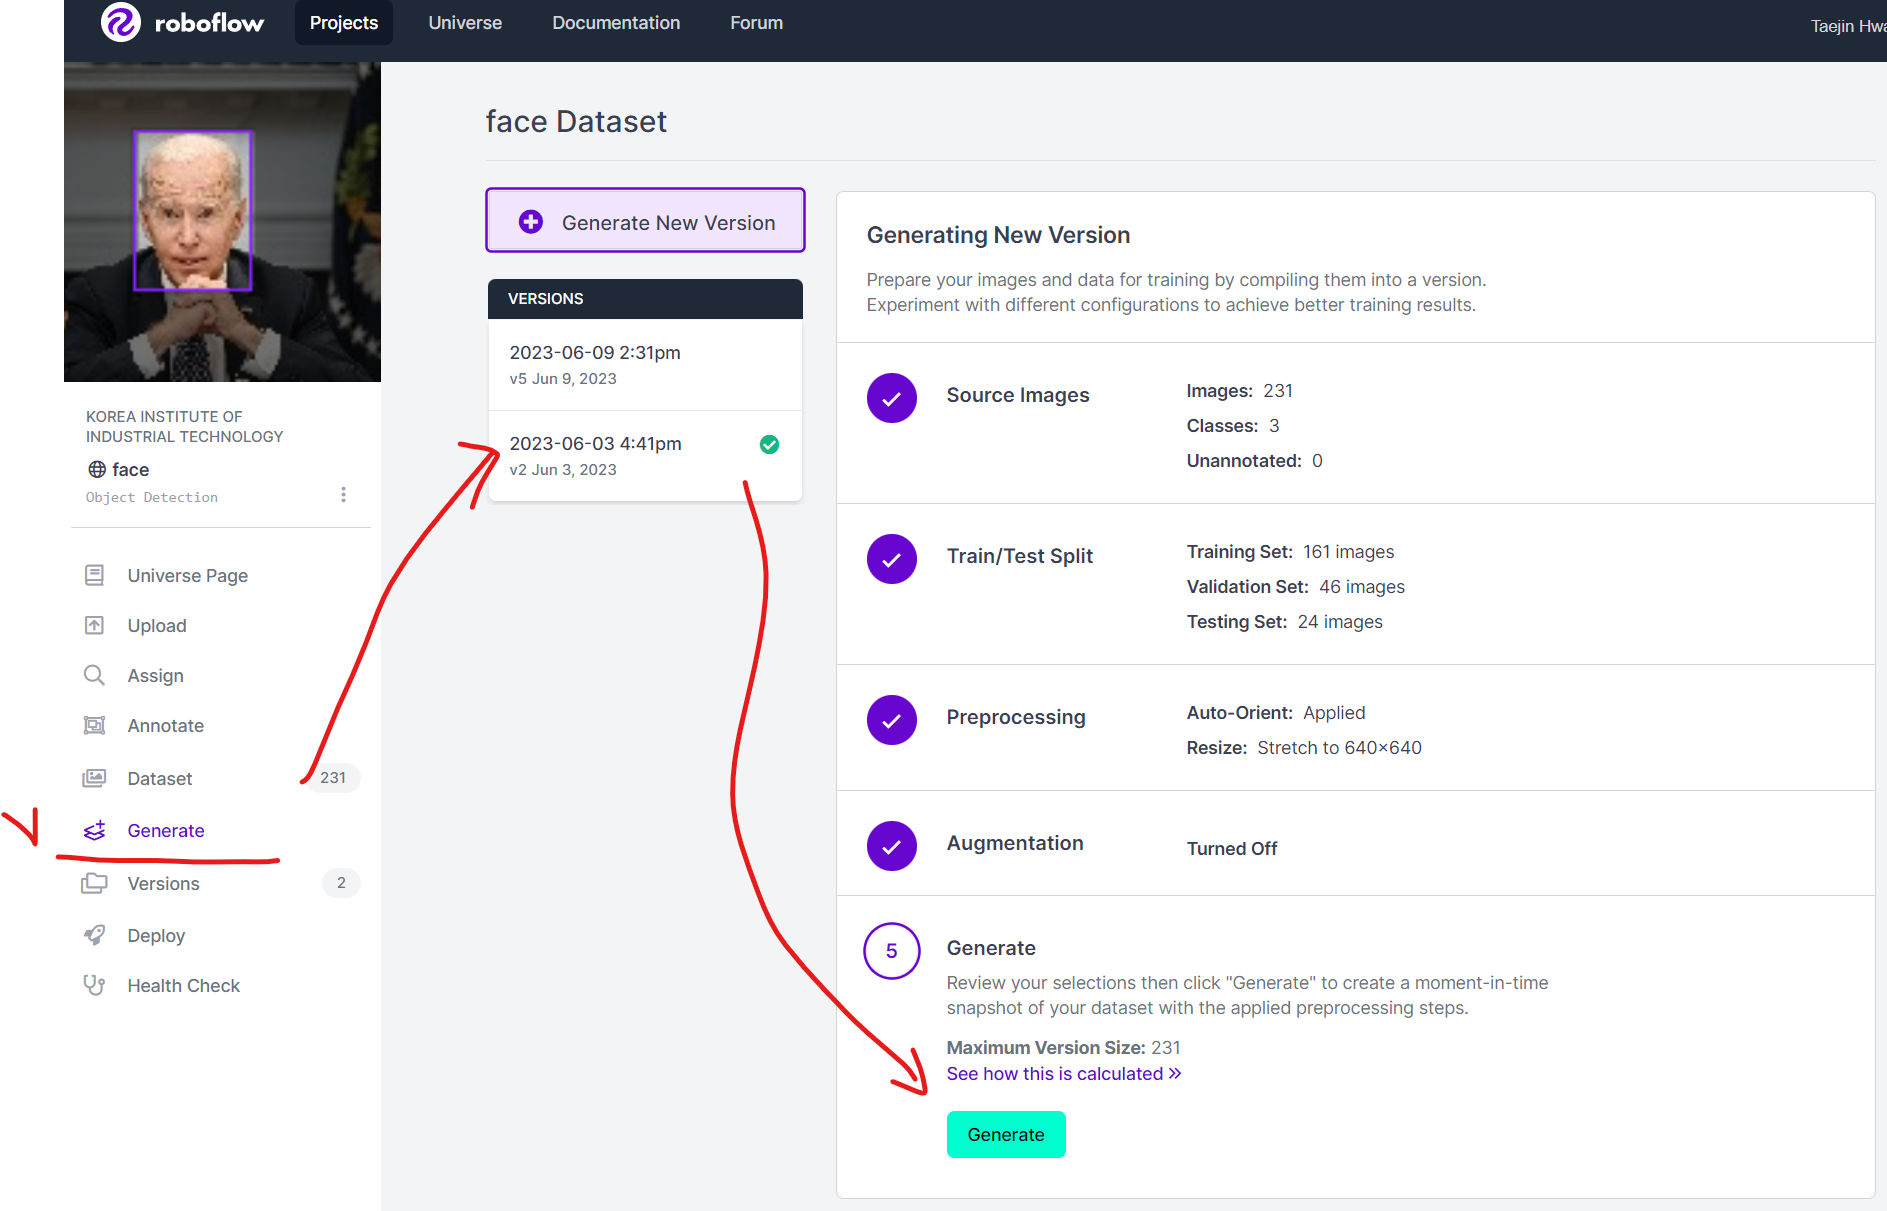

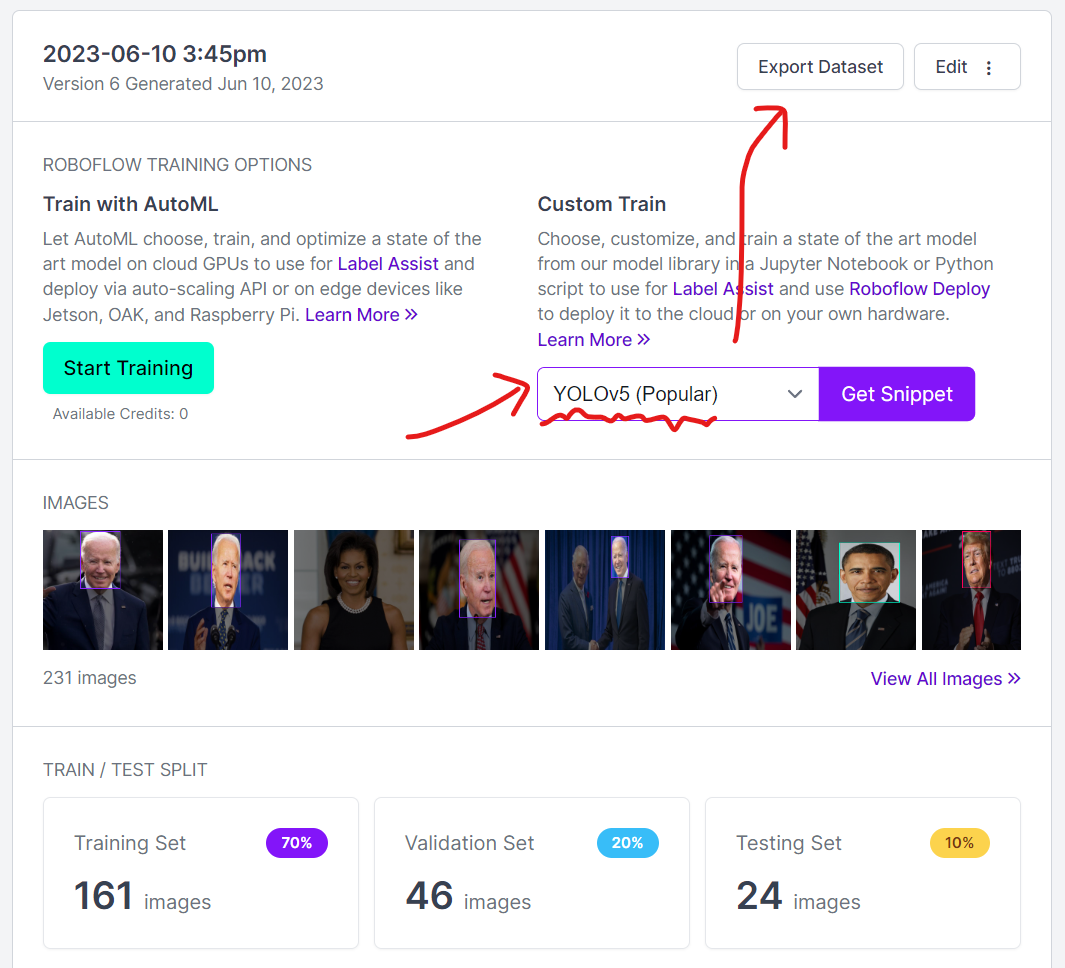

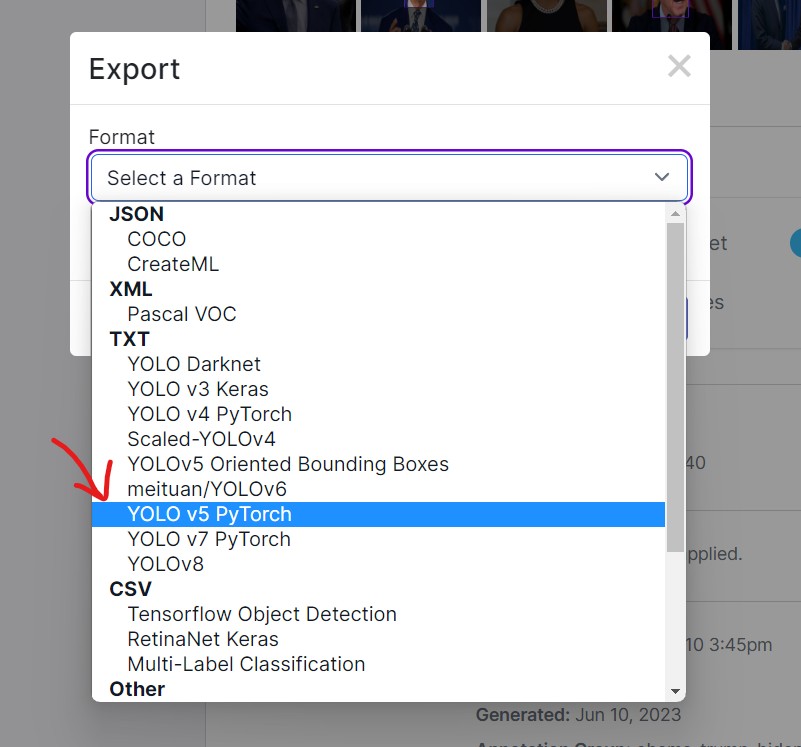

4. 다운받은 데이터셋 압축파일을 풀어서 학습 데이터셋을 완성합니다.

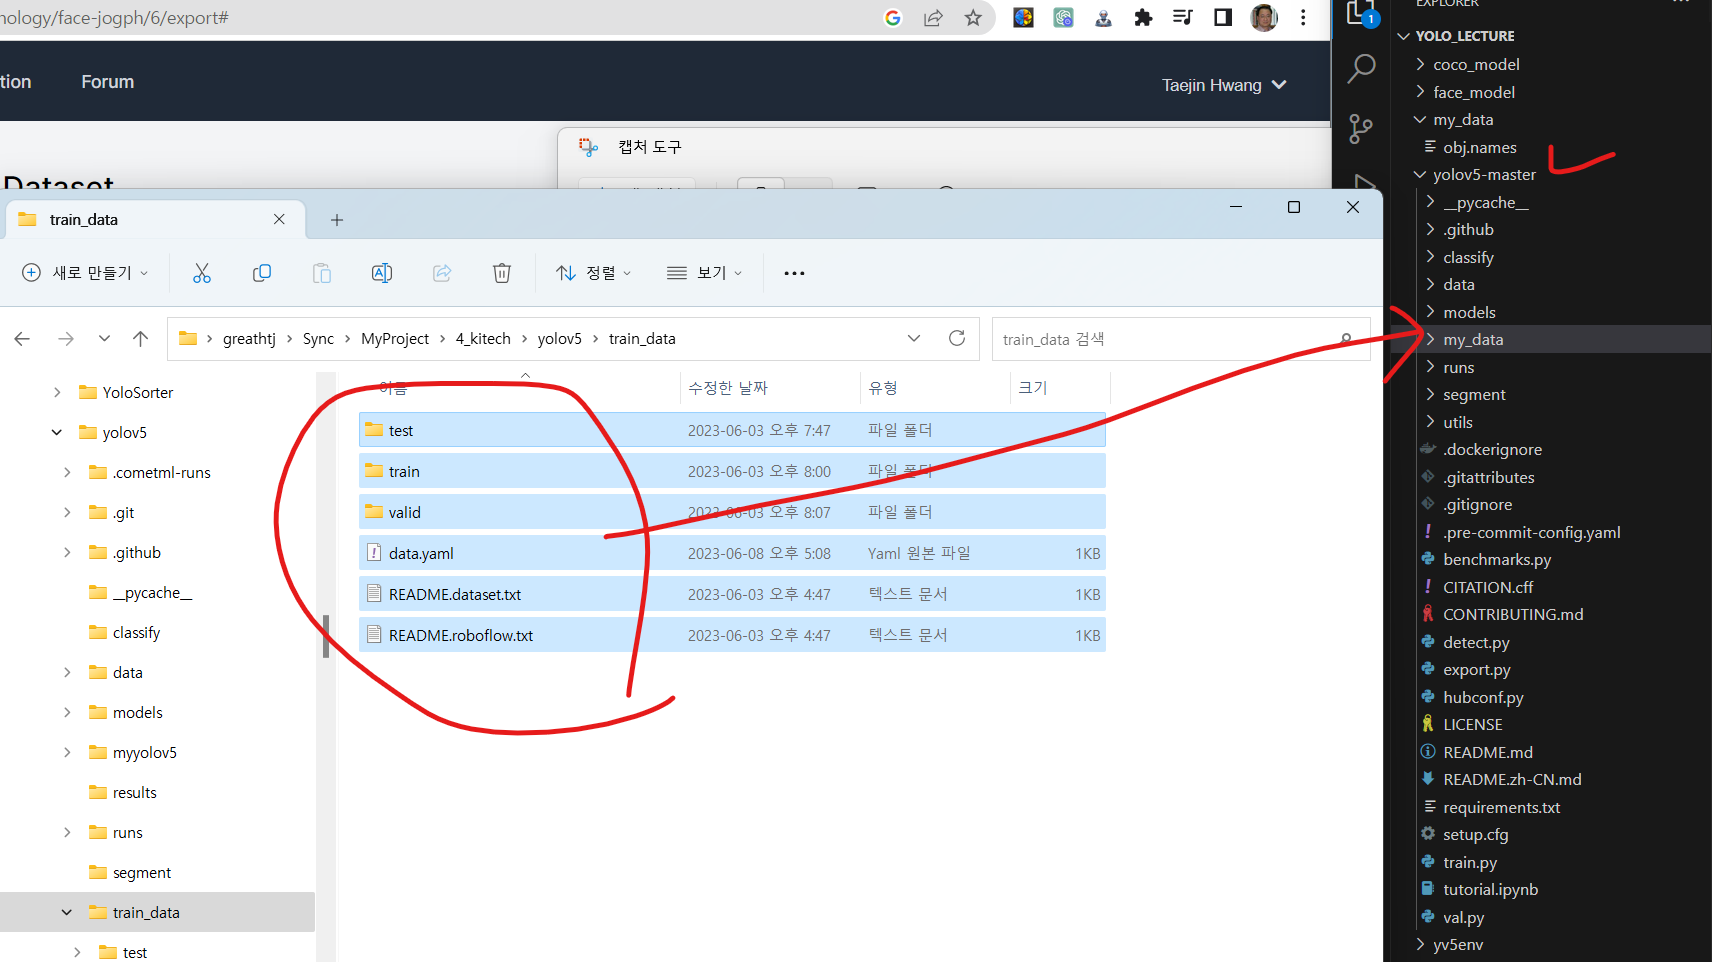

5. data.yaml 파일을 편집합니다.

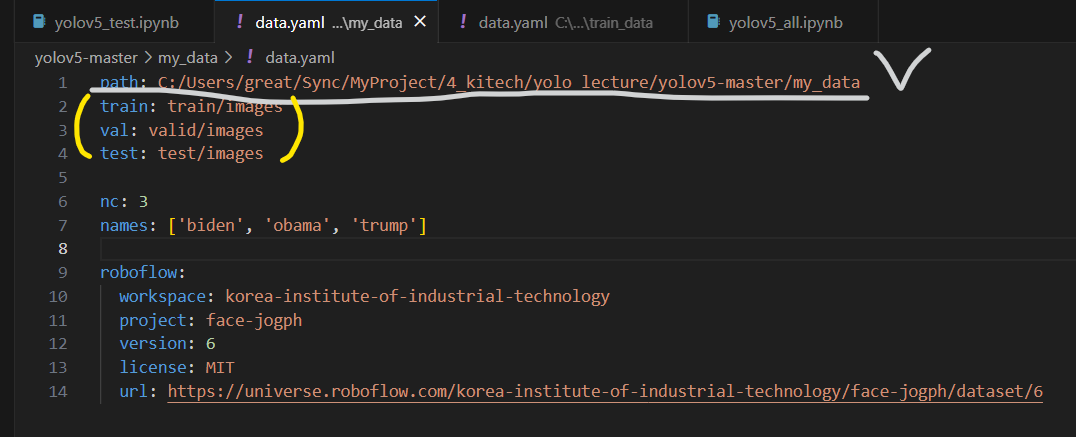

6. 학습을 진행합니다. (단, GPU가 설치된 컴퓨터가 필요할 겁니다. 그리고 git도 설치해야 합니다.)

    - python yolov5-master/train.py --img 640 --epochs 500 --data yolov5-master/my_data/data.yaml --weights yolov5s.pt

In [ ]:
import subprocess

subprocess.run(["python", "yolov5-master/train.py",
                "--img", "640",
                "--epochs", "500",
                "--data", "yolov5-master/my_data/data.yaml",
                "--weights", "yolov5s.pt"])

## Detection을 위한 기본 코드를 만들어봅시다.
* pip install yolov5

In [6]:
import yolov5
import cv2

# load pretrained model
# model = yolov5.load('yolov5s.pt')
# # or load custom model
model = yolov5.load('yolov5/runs/train/exp/weights/best.pt')
  
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    #  set image
    ret, img = cap.read()
    if ret:
        # perform inference
        results = model(img)
        # parse results
        predictions = results.pred[0]
        # show detection bounding boxes on image
        results.render()

        cv2.imshow("yolov5", img)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

c:\Users\great\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5  2023-6-3 Python-3.10.9 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 214 layers, 7027720 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 
